# Mobile games A/B testing

### Importing Dataset and priliminary observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("cookie_cats.csv")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# Check null values

data.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [4]:
# Balance of the data

data.groupby('version').count()
# data['version'].value_counts()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


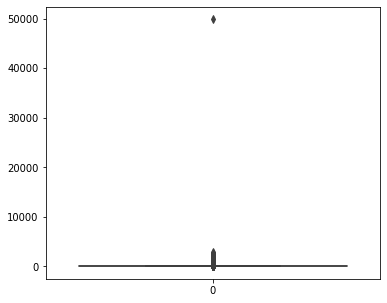

In [5]:
# Box plot

plt.figure(figsize=(6,5))
sns.boxplot(data['sum_gamerounds'])
plt.show()

In [6]:
# There is an outlier who has played 50000 game rounds in the first week

In [7]:
data['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [8]:
# Number of players for each game rounds

d1 = data.groupby('sum_gamerounds')['userid'].count()
df1 = pd.DataFrame(d1)

df1['cum_sum'] = df1['userid'].cumsum()
df1.head()

df1['cum_sum_perc'] = np.round((df1['cum_sum'] / df1['userid'].sum())*100,1)
df1.head()

# df1[df1['cum_sum_perc'] > 50].head()
# df1[df1['cum_sum_perc'] > 75].head()

,userid,cum_sum,cum_sum_perc
sum_gamerounds,,,
0,3994,3994,4.4
1,5538,9532,10.6
2,4606,14138,15.7
3,3958,18096,20.1
4,3629,21725,24.1


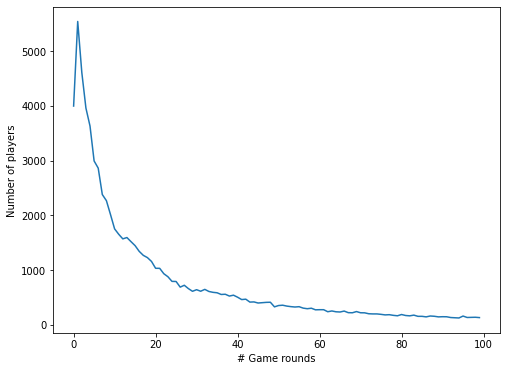

In [9]:
# Plot graph who has played 0 to 100 games within first week playing the game

plt.figure(figsize=(8,6))
plt.plot(d1[:100])
plt.xlabel("# Game rounds")
plt.ylabel("Number of players")
plt.show()

In [10]:
# Large number of players play small number of rounds

### Analysing 1-day retention stats

In [11]:
# Overall 1-day retention

one_day_ret = data['retention_1'].sum() / data['retention_1'].count()
print(one_day_ret)
print("===================================")

# 1-day retention group wise

print(data.groupby('version')['retention_1'].mean())

0.4452095044850259
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


In [12]:
# There is a slight decrease in gate_40 when compared to gate_30

In [13]:
# Bootstrapping the data with replacement

boot_1dr = []

for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1dr.append(boot_mean)
    
boot_1dr = pd.DataFrame(boot_1dr)
boot_1dr.head()

version,gate_30,gate_40
retention_1,0.443401,0.438742
retention_1,0.451065,0.443642
retention_1,0.447922,0.442144
retention_1,0.450789,0.441957
retention_1,0.447783,0.442646


<Figure size 576x432 with 0 Axes>

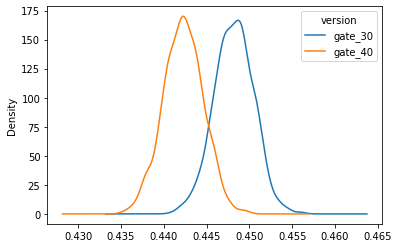

In [14]:
plt.figure(figsize=(8,6))
boot_1dr.plot(kind='density')
plt.show()

In [15]:
# There is some evidence of difference between the 2 columns.
# Plot the difference between gate_30 and gate_40

boot_1dr['diff'] = ((boot_1dr['gate_30'] - boot_1dr['gate_40']) / boot_1dr['gate_40'])*100
boot_1dr.head()

version,gate_30,gate_40,diff
retention_1,0.443401,0.438742,1.061752
retention_1,0.451065,0.443642,1.673262
retention_1,0.447922,0.442144,1.306728
retention_1,0.450789,0.441957,1.998347
retention_1,0.447783,0.442646,1.160601


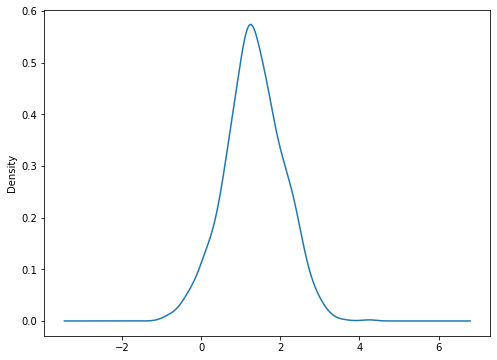

Probability that 1-day retention is greater when gate is 30: 0.962


In [16]:
plt.figure(figsize=(8,6))
boot_1dr['diff'].plot(kind='density')
plt.show()

print("===================================================================")
print("Probability that 1-day retention is greater when gate is 30:", (boot_1dr['diff']>0).mean())

In [17]:
# 97% of the distribution is above 0 and in favor of gate at level 30

### Analysing 7-day retention stats

In [18]:
# 7-day retention group wise

data.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [19]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [20]:
boot_7dr = []

for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7dr.append(boot_mean)
    
boot_7dr = pd.DataFrame(boot_7dr)
boot_7dr.head()

version,gate_30,gate_40
retention_7,0.193406,0.181610
retention_7,0.192713,0.182566
retention_7,0.188360,0.182653
retention_7,0.190835,0.180380
retention_7,0.193098,0.178503


<Figure size 576x432 with 0 Axes>

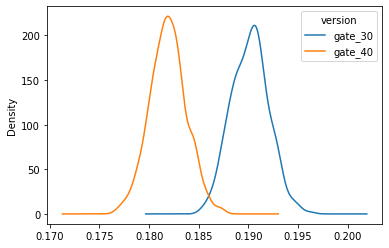

In [21]:
plt.figure(figsize=(8,6))
boot_7dr.plot(kind='density')
plt.show()

In [22]:
boot_7dr['diff'] = ((boot_7dr['gate_30'] - boot_7dr['gate_40']) / boot_7dr['gate_40'])*100
boot_7dr.head()

version,gate_30,gate_40,diff
retention_7,0.193406,0.181610,6.495331
retention_7,0.192713,0.182566,5.558010
retention_7,0.188360,0.182653,3.124769
retention_7,0.190835,0.180380,5.795954
retention_7,0.193098,0.178503,8.176514


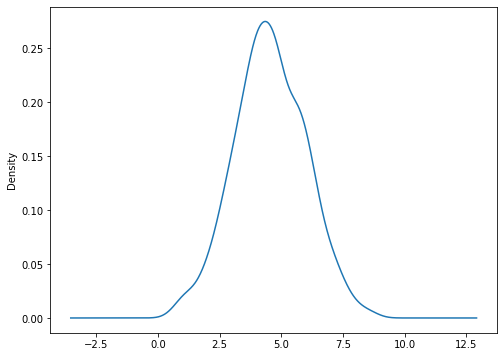

Probability that 7-day retention is greater when gate is 30: 1.0


In [23]:
plt.figure(figsize=(8,6))
boot_7dr['diff'].plot(kind='density')
plt.show()

print("===================================================================")
print("Probability that 7-day retention is greater when gate is 30:", (boot_7dr['diff']>0).mean())

### Conclusion

In [24]:
# From the above 2 analysis, it is clear that the retention rate is higher when the gate is at level 30 than when it is at level 40

In [25]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [28]:
# chi-squared test

from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(data['version'], data['retention_7'])
result = chi2_contingency(contigency_table)
print("p-score",result[1])

p-score 0.0016005742679058301


In [31]:
# p-score < 0.05 suggesting that we reject the null hypothesis and there is a significant difference in player retention between 2 groups